#Import necessary libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Part 1: Data Preprocessing

#Load the dataset

In [39]:
df = pd.read_csv("Netflix_Userbase.csv")
# Display the structure of the dataset
print(df.head())
print(df.info())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             -----

#Missing Values

In [40]:
# Identify and manage missing values
print(df.isnull().sum())

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


#Encode Categorical Variables

In [41]:
df_encoded = pd.get_dummies(df, columns=['Subscription Type', 'Country', 'Gender', 'Device'])
print(df_encoded)

      User ID  Monthly Revenue Join Date Last Payment Date  Age Plan Duration  \
0           1               10  15-01-22          10-06-23   28       1 Month   
1           2               15  05-09-21          22-06-23   35       1 Month   
2           3               12  28-02-23          27-06-23   42       1 Month   
3           4               12  10-07-22          26-06-23   51       1 Month   
4           5               10  01-05-23          28-06-23   33       1 Month   
...       ...              ...       ...               ...  ...           ...   
2495     2496               14  25-07-22          12-07-23   28       1 Month   
2496     2497               15  04-08-22          14-07-23   33       1 Month   
2497     2498               12  09-08-22          15-07-23   38       1 Month   
2498     2499               13  12-08-22          12-07-23   48       1 Month   
2499     2500               15  13-08-22          12-07-23   35       1 Month   

      Subscription Type_Bas

#Feature Selection

In [42]:
selected_features = encoded_df.columns.tolist()
selected_features.remove('Monthly Revenue')
print(selected_features)


['User ID', 'Join Date', 'Last Payment Date', 'Age', 'Plan Duration', 'Country_Brazil', 'Country_Canada', 'Country_France', 'Country_Germany', 'Country_Italy', 'Country_Mexico', 'Country_Spain', 'Country_United Kingdom', 'Country_United States', 'Gender_Male', 'Device_Smart TV', 'Device_Smartphone', 'Device_Tablet', 'Subscription Type_Premium', 'Subscription Type_Standard']


#Part 2: Exploratory Data Analysis (EDA)

#Descriptive Statistics

In [43]:
print(encoded_df.describe())


          User ID  Monthly Revenue          Age  Country_Brazil  \
count  2500.00000      2500.000000  2500.000000     2500.000000   
mean   1250.50000        12.508400    38.795600        0.073200   
std     721.83216         1.686851     7.171778        0.260517   
min       1.00000        10.000000    26.000000        0.000000   
25%     625.75000        11.000000    32.000000        0.000000   
50%    1250.50000        12.000000    39.000000        0.000000   
75%    1875.25000        14.000000    45.000000        0.000000   
max    2500.00000        15.000000    51.000000        1.000000   

       Country_Canada  Country_France  Country_Germany  Country_Italy  \
count     2500.000000     2500.000000      2500.000000    2500.000000   
mean         0.126800        0.073200         0.073200       0.073200   
std          0.332815        0.260517         0.260517       0.260517   
min          0.000000        0.000000         0.000000       0.000000   
25%          0.000000        0.

#Visualizations

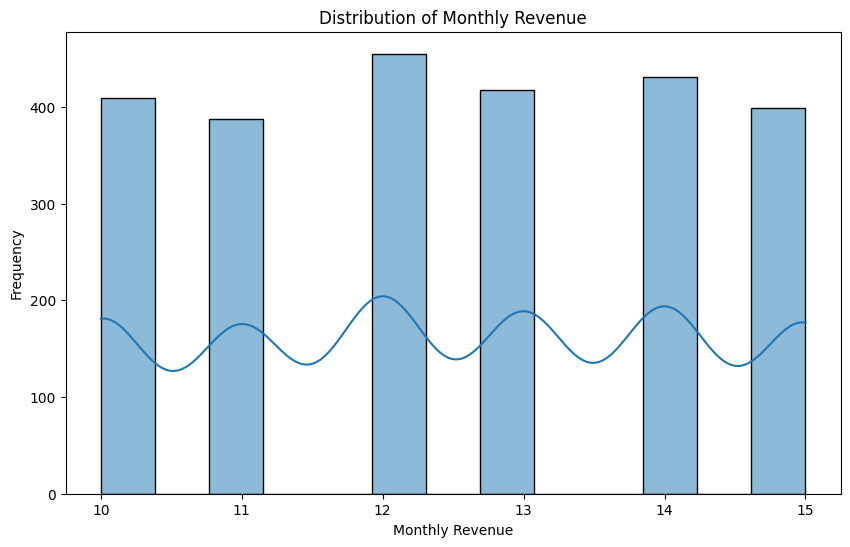

In [44]:
# Distribution of Monthly Revenue
plt.figure(figsize=(10, 6))
sns.histplot(data=encoded_df, x='Monthly Revenue', kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

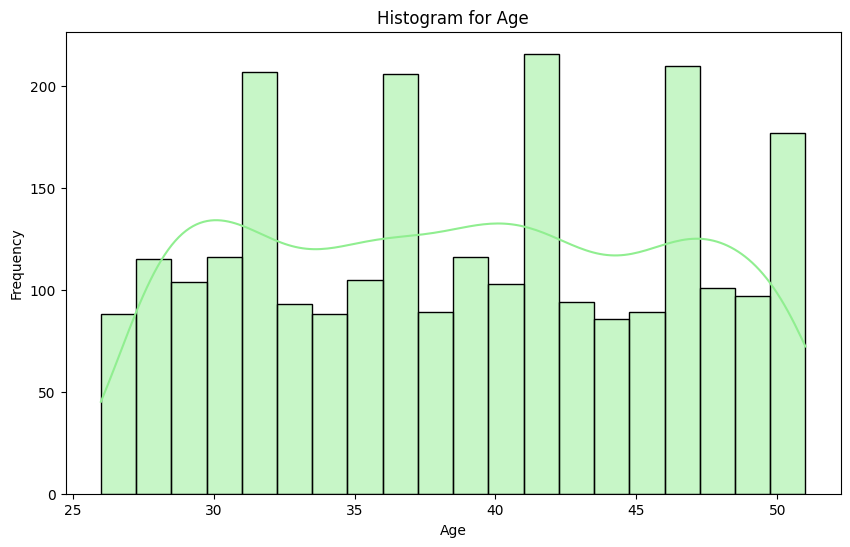

In [32]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='lightgreen')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-45-bae747c23a1b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df, palette='Set2')


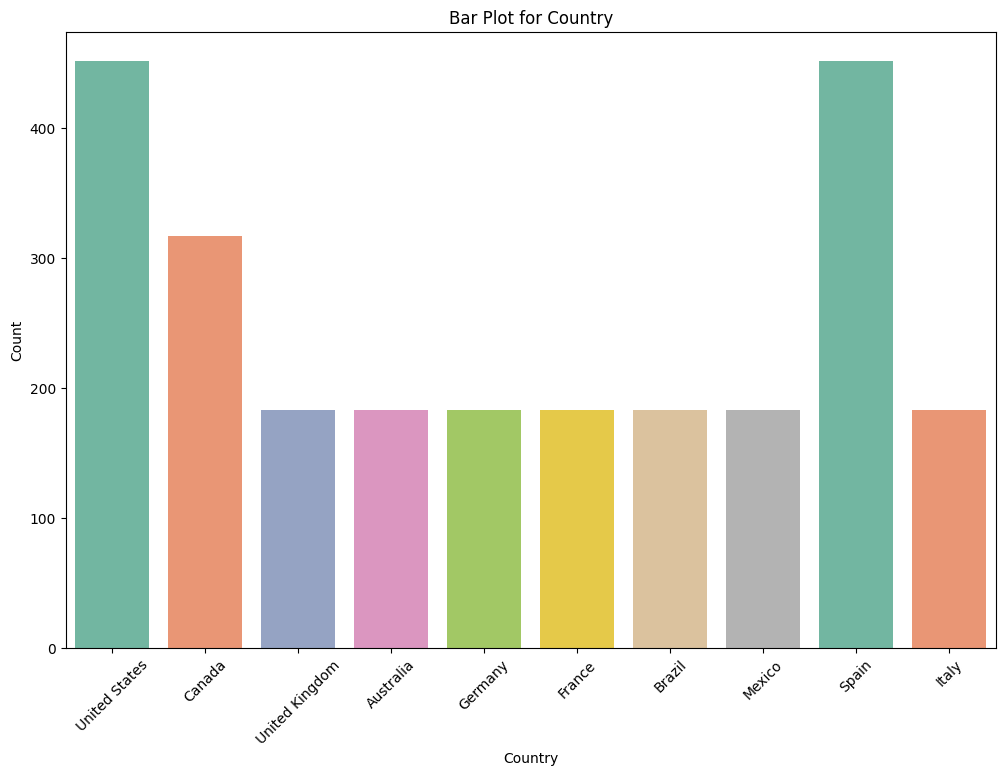

In [45]:
#Bar plot for country
plt.figure(figsize=(12, 8))
sns.countplot(x='Country', data=df, palette='Set2')
plt.title('Bar Plot for Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-46-1944a638cdcc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


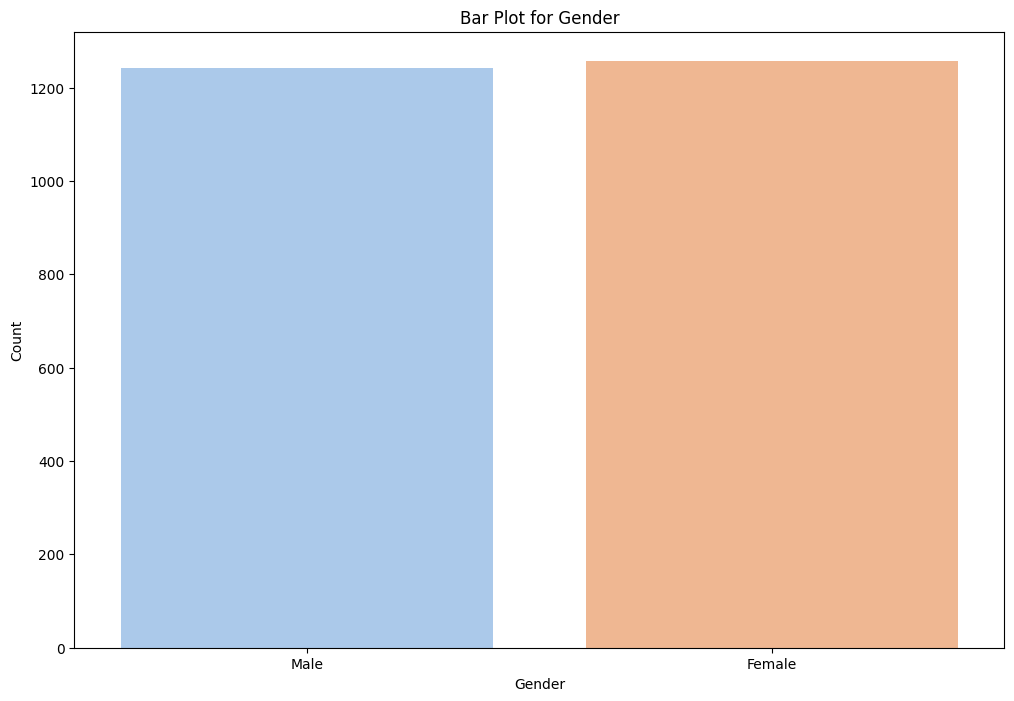

In [46]:
# Bar plot for Gender
plt.figure(figsize=(12, 8))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Bar Plot for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#Part 3: Linear Regression Model (Predicting Monthly Revenue)

#Build the Model

In [36]:
X = df_encoded[['Subscription Type_Basic','Subscription Type_Premium', 'Subscription Type_Standard', 'Age','Gender_Female','Gender_Male','Device_Laptop',  'Device_Smart TV', 'Device_Smartphone'  ,'Device_Tablet'  ]]
y = df_encoded['Monthly Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R-squared:", r_squared)
print("RMSE:", rmse)

R-squared: -0.015913317831238505
RMSE: 1.6751450881423562


#Part 4: Logistic Regression Model (Predicting Customer Feedback)

#Model Building